# Machine-Learning-Terrorism-Prediction

Organise imports

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
    
import numpy as np
    
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

## Load the csv dataset

In [141]:
path = './data/globalterrorismdb.csv'
columnNames = pd.read_csv(path, encoding="utf-8").columns.tolist()

## Create a dataframe

In [142]:
dataFrame = pd.read_csv(path, names=columnNames)

Let's print our number of columns (possible features)

In [143]:
dataFrame.columns.size

140

Let's list them all

In [144]:
list(dataFrame.columns.values)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

Official columns attribute description:

- **eventid**: A 12-digit Event ID system. First 8 numbers – date recorded “yyyymmdd”. Last 4 numbers – sequential case number for the given day (0001, 0002 etc).

- **iyear**: This field contains the year in which the incident occurred.
- **imonth**: This field contains the number of the month in which the incident occurred.
- **iday**: This field contains the numeric day of the month on which the incident occurred.

- **extended**: 1 = "Yes" The duration of an incident extended more than 24 hours. 0 = "No" The duration of an incident extended less than 24 hours.

- **country**: This field identifies the country code
- **country_txt**: This field identifies the country or location where the incident occurred.
- **region**: This field identifies the region code based on 12 regions
- **region_txt**: This field identifies the region in which the incident occurred.
- **provstate**: Name (at the time of event) of the 1st order subnational administrative region
- **city**: Name of the city, village, or town in which the incident occurred
- **latitude**: The latitude of the city in which the event occurred.
- **longitude**: The longitude of the city in which the event occurred.

- **success**: Success of a terrorist strike
- **suicide**: 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide attack.
- **attacktype1**: The general method of attack
- **attacktype1_txt**: The general method of attack and broad class of tactics used.

- **targtype1_txt**: The general type of target/victim
- **targsubtype1_txt**: The more specific target category

- **target1**: The specific person, building, installation that was targeted and/or victimized

- **natlty1_txt**: The nationality of the target that was attacked

- **gname**: The name of the group that carried out the attack
- **gsubname**: Additional details about group that carried out the attack like factions

- **nperps**: The total number of terrorists participating in the incident

- **weaptype1_txt**: General type of weapon used in the incident
- **weapsubtype1_txt**: More specific value for most of the Weapon Types

- **nkill**: The number of total confirmed fatalities for the incident
- **nkillus**: The number of U.S. citizens who died as a result of the incident
- **nwound**: Number of confirmed non-fatal injuries to both perpetrators and victims.
- **nwoundus**: The number of confirmed non-fatal injuries to U.S. citizens, both perpetrators and victims.

Let's only keep the documented features in our dataframe. This will make the analysis easier.

In [145]:
categorylist = ['eventid',
                'iyear',
                'imonth',
                'iday',
                'extended',
                'country',
                'country_txt',
                'region',
                'region_txt',
                'provstate',
                'city',
                'latitude',
                'longitude',
                'success',
                'suicide',
                'attacktype1',
                'attacktype1_txt',
                'targtype1_txt',
                'targsubtype1_txt',
                'target1',
                'natlty1_txt',
                'gname',
                'gsubname',
                'nperps',
                'weaptype1_txt',
                'weapsubtype1_txt',
                'nkill',
                'nkillus',
                'nwound',
                'nwoundus'
               ]

In [146]:
selectedDataFrame = dataFrame[categorylist]
selectedDataFrame.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nwound,nwoundus
0,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nwound,nwoundus
1,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,Dominican Republic,MANO-D,NaN,NaN,Unknown,NaN,1,NaN,0,NaN
2,197000000002,1970,0,0,0,130,Mexico,1,North America,NaN,...,Belgium,23rd of September Communist League,NaN,7,Unknown,NaN,0,NaN,0,NaN
3,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,United States,Unknown,NaN,NaN,Unknown,NaN,1,NaN,0,NaN
4,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,United States,Unknown,NaN,NaN,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN,NaN,NaN


## Browse our data before going further

Country occurence

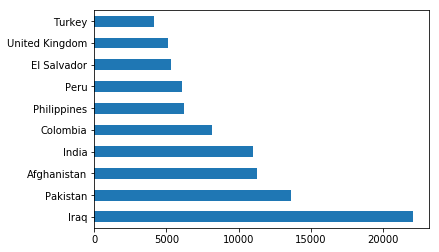

In [147]:
selectedDataFrame['country_txt'].value_counts()[:10].plot(kind='barh')

City occurence

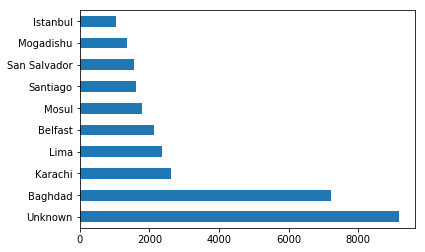

In [148]:
selectedDataFrame['city'].value_counts()[:10].plot(kind='barh')

General method of attack and broad class of tactics used occurence

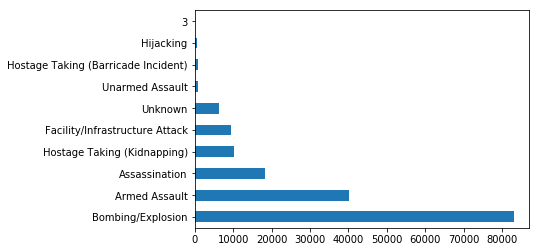

In [149]:
selectedDataFrame['attacktype1_txt'].value_counts()[:10].plot(kind='barh')

General type of weapon used in the incident occurence

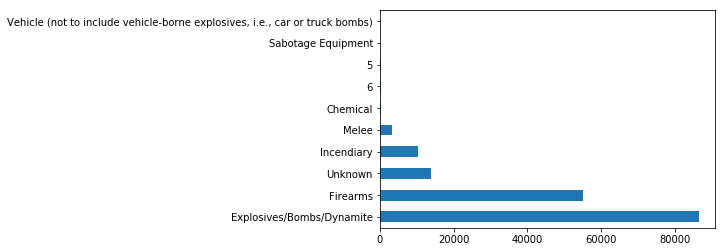

In [150]:
selectedDataFrame['weaptype1_txt'].value_counts()[:10].plot(kind='barh')

Number of total confirmed fatalities for the incident occurence

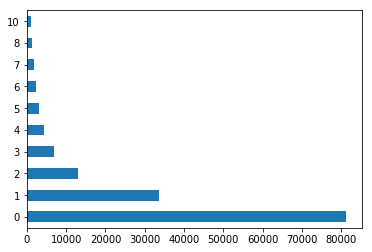

In [151]:
selectedDataFrame['nkill'].value_counts()[:10].plot(kind='barh')

## Label Encoding